# Diabetes Prediction

Various Health Care professionals are interesting in predicting diabetes for the patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Besides Health Care professionals pharmaceutical companies are also interested in predicting the patients contacting diabetes so that they can do customer profiling.

In this project we will specifically focus on predicting Diabetes on the basis of various predictors. For this we will compare Accuracy score of various models and pick the most accurate model.

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

# Liabrary 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("E:\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Introduction

1. Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

2. Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.



3. Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

4. Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

5. Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.



6. Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

7. HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.



8. Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.



# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
df[df["age"]<1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
218,Female,0.56,0,0,No Info,16.85,5.0,140,0
241,Male,0.88,0,0,No Info,17.49,6.0,140,0
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
396,Male,0.16,0,0,No Info,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
99452,Male,0.32,0,0,No Info,15.93,5.7,100,0
99536,Female,0.40,0,0,No Info,16.66,3.5,140,0
99629,Female,0.64,0,0,No Info,17.58,6.1,140,0
99778,Female,0.32,0,0,No Info,12.26,5.8,126,0


In [9]:
df["age"] = df["age"].apply(lambda x: x*100 if x<1 else x)

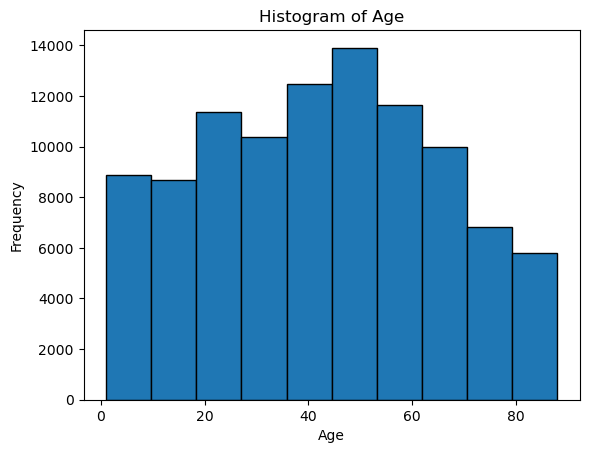

In [10]:
 #Histogram for feature 'age'
plt.hist(df['age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,42.361769,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.302911,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,88.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
df1=pd.get_dummies(df,columns=["gender","smoking_history"],drop_first=True)
df1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


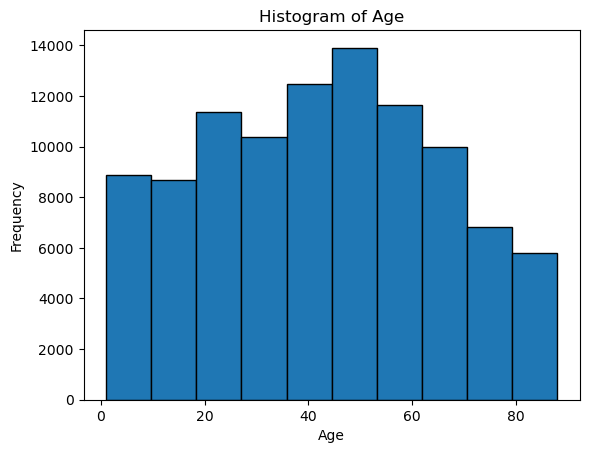

In [14]:
#Histogram for feature 'age'
plt.hist(df['age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [15]:
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,42.361769,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.414300,0.000180,0.092860,0.040040,0.093520,0.35095,0.06447
std,22.302911,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.492603,0.013415,0.290238,0.196054,0.291161,0.47727,0.24559
min,1.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,88.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [16]:
scaler = MinMaxScaler()

In [17]:
l= ["age","bmi","HbA1c_level","blood_glucose_level"]
for i in l:
    df1[i] = scaler.fit_transform(df1[[i]])

In [18]:
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,0.475423,0.07485,0.039420,0.202040,0.368638,0.263900,0.085000,0.414300,0.000180,0.092860,0.040040,0.093520,0.35095,0.06447
std,0.256355,0.26315,0.194593,0.077460,0.194668,0.185037,0.278883,0.492603,0.013415,0.290238,0.196054,0.291161,0.47727,0.24559
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.264368,0.00000,0.000000,0.158964,0.236364,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.482759,0.00000,0.000000,0.202031,0.418182,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,0.678161,0.00000,0.000000,0.228408,0.490909,0.359091,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


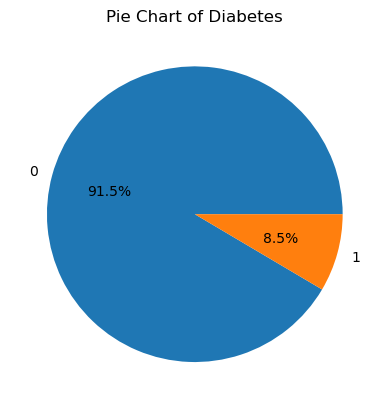

In [19]:
# Pie chart untuk variable 'diabetes'
diabetes_counts = df['diabetes'].value_counts()
plt.pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Diabetes')
plt.show()

In [20]:
X = df1.drop("diabetes", axis = 1)
y = df1.diabetes

In [21]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.908046,0,1,0.177171,0.563636,0.272727,0,0,0,0,0,1,0
1,0.609195,0,0,0.202031,0.563636,0.000000,0,0,0,0,0,0,0
2,0.310345,0,0,0.202031,0.400000,0.354545,1,0,0,0,0,1,0
3,0.402299,0,0,0.156863,0.272727,0.340909,0,0,1,0,0,0,0
4,0.862069,1,1,0.118231,0.236364,0.340909,1,0,1,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Create a LogisticRegression instance
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = lr.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.95915


In [26]:
from sklearn.metrics import classification_report

y_pred=lr.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)
cr=(classification_report(y_test,y_pred))
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# using Hyper tuning parameter With the LogisticRegression


In [27]:
# Define the logistic regression model with specified hyperparameters
lr = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the labels for the test set
y_pred1 = lr.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred1)
cr=(classification_report(y_test,y_pred1))
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.97035


In [29]:
from sklearn.metrics import classification_report

y_pred2=rf.predict(X_test)
y_pred2
accuracy_score(y_test,y_pred2)
cr=(classification_report(y_test,y_pred2))
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# using Hyper tuning parameter With the  RandomForestClssifier


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(n_estimators=200,criterion='gini')

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.97


In [31]:
y_pred3=rf.predict(X_test)
y_pred3
accuracy_score(y_test,y_pred3)
cr=(classification_report(y_test,y_pred3))
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# GradientBoostingClassifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Create a GradientBoostingClassifier instance
xg = GradientBoostingClassifier()

# Train the model on the training data
xg.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = xg.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.97265


In [34]:
y_pred4=xg.predict(X_test)
y_pred4
accuracy_score(y_test,y_pred4)
cr=(classification_report(y_test,y_pred4))
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



# using Hyper tuning parameter With the Gradient Boost classifier


In [35]:
# Define the Gradient Boosting classifier with specified hyperparameters
xg = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    max_features=0.8  # Changed "colsample_bytree" to "max_features"
)

# Fit the model to the training data
xg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred5 = xg.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred5)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred5))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



#  Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost classifier
boost = AdaBoostClassifier()

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred6 = boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred6)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred6))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



# using Hyper tuning parameter With the Adaboost

In [37]:
# Define the AdaBoost classifier with specified hyperparameters
boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred7 = boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred7)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred7))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



# XGBoost

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred8 = xgb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred8)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred8))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



# using Hyper tuning parameter With the XGboost

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {
    #'learning_rate': [0.01, 0.05, 0.1],
    #'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new XGBoost classifier with the best parameters
xgb_classifier = xgb.XGBClassifier(**best_params)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred9= xgb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred9)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred9))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000




# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred10 = model.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred10)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred10))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



# using Hyper tuning parameter With the Decision Tree Classifier

In [41]:
# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best parameters
model = DecisionTreeClassifier(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred11 = model.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred11)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred11))
print(cr)

Test Accuracy: 0.97265
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [42]:
#checking all models accuracy
final_df = pd.DataFrame({'Models':['lr','lr_para','Radomforest','Randomforest_para','Gradient','Gradient_boost_para','Adaboost','Adaboost_para','XGboost','XGboost_para','DecisionTree','DecisionTree_para'],
                        'ACC':[accuracy_score(y_test,y_pred),
                              accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6),
                              accuracy_score(y_test,y_pred7),
                              accuracy_score(y_test,y_pred8),
                              accuracy_score(y_test,y_pred9),
                              accuracy_score(y_test,y_pred10),
                              accuracy_score(y_test,y_pred11)


]})
final_df

,Models,ACC
0,lr,0.95915
1,lr_para,0.95915
2,Radomforest,0.97035
3,Randomforest_para,0.97000
4,Gradient,0.97265
5,Gradient_boost_para,0.97240
6,Adaboost,0.97250
7,Adaboost_para,0.97230
8,XGboost,0.97180
9,XGboost_para,0.97180


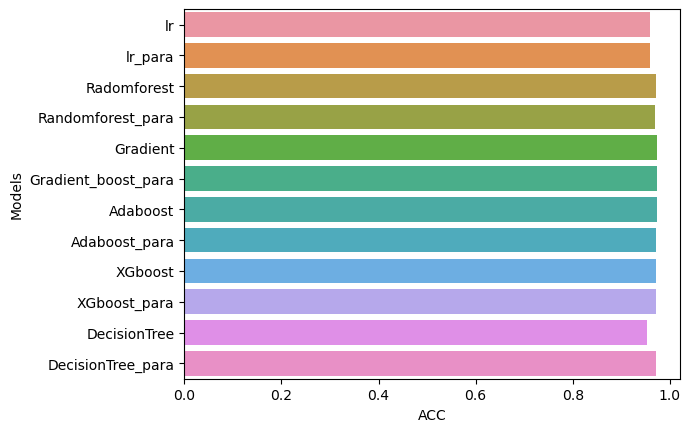

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='Models', x='ACC', data=final_df, orient='h')
plt.show()
